* First import the `US_States_Visited_2017.xlsx`, `US_States_Visited_2018.xlsx` and `US_States_Visited_2019.xlsx` datasets. The three datasets are located at the assets folder. You may start with `read_excel()` function in pandas and remove the top and bottom rows. In each file, some column should contain the state.  Subsequent columns include the number of visitors in two different years.   Note that some data is duplicated, and the year of the datafile indicates when the file was made available (so 2016 data is in the 2017 datafile).

* After that, pick out the relevant columns.  Note that you will need to multiply all the visitation numbers by 1,000. For example, in 2019, the recorded visitation for Alabama state was supposed to be 141,000 after multiplying 1,000. This must be applied for all 3 datasets.

* Finally, you should merge the 3 datasets together, and rename the merged dataset called `merged_US_states_visitation`. The merged dataset should retain only the census states called `state`, 2016 visitation data called `visitation_2016`, 2017 visitation data called `visitation_2017`, 2018 visitation data called `visitation_2018`and 2019 visitation data called `visitation_2019`. To avoid confusion, when we join the datasets, keep every states that ever has international visitation data. Finally, order the state names alphabetically. 



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import regex as re

def load_data() -> pd.DataFrame:
    
   data_2017 = './assets/US_States_Visited_2017.xlsx'
   header_2017 = ['rank', 'state', 'share_2016', 'visitation_2016','share_2017','visitation_2017', 'change']
   data_2018 = './assets/US_States_Visited_2018.xlsx'
   header_2018 = ['rank', 'state', 'share_2018', 'visitation_2018','change','share_2017', 'visitation_2017']
   data_2019 = './assets/US_States_Visited_2019.xlsx'
   header_2019 = ['rank', 'state', 'share_2019', 'visitation_2019','change','share_2018', 'visitation_2018']
   year_regex= r'[0-9]{4}(?=.xlsx)'
   
   def get_clean_frame(file_name,header_list):
      current = int(re.search(year_regex,file_name).group())
      share_current= 'share_{}'.format(current)
      share_prior= 'share_{}'.format(current-1)
      
      frame = pd.read_excel(file_name)
      frame.dropna(inplace=True) #remove all the text cells
      frame.set_axis(header_list, axis=1, inplace=True)
      frame = frame.iloc[2: , :] #drop the header rows
      frame.drop(columns=['rank', share_current, share_prior,'change'],inplace=True)
      frame.reset_index(drop=True, inplace=True)
      frame['state'] = frame['state'].str.replace(' ', '')
      frame.set_index('state', inplace=True)
      
      return frame.sort_index()

   frame2017 = get_clean_frame(data_2017, header_2017)
   frame2018 = get_clean_frame(data_2018, header_2018)
   frame2019 = get_clean_frame(data_2019, header_2019)
   
   #review for better solution. maybe something less messy
   merged = pd.merge(frame2017,frame2018, on='state',how='outer').merge(frame2019,on='state',how='outer')
   merged.fillna('', inplace=True)
   merged = merged.apply(pd.to_numeric)
   merged = merged * 1000
   #this seems a bit too brute force. need to have look at api docs
   merged['visitation_2017'] = merged.apply(lambda row: row['visitation_2017_x'] if row['visitation_2017_x'] != np.NaN else row['visitation_2017_y'], axis=1)
   merged['visitation_2018'] = merged.apply(lambda row: row['visitation_2018_x'] if row['visitation_2018_x'] != np.NaN else row['visitation_2018_y'], axis=1)
   merged_US_states_visitation = merged.drop(columns=['visitation_2017_x', 'visitation_2017_y','visitation_2018_x','visitation_2018_y'])

   return merged_US_states_visitation

# Tests
# These tests do not ensure that your solution is correct, but are meant to help you find out where you might have gone wrong
df = load_data()
assert type(df)==pd.DataFrame, "Your return value must be a pandas DataFrame"
assert df.index.size == 40, "You should have 40 rows in your solution"
assert all(['visitation_' + str(year) in df.columns for year in [2016, 2017, 2018, 2019]]), "Some of your column name are incorrect"
try:
   assert df.iloc[0].name == 'Alabama', "We expected to see Alabama as the first entry but it was not"
except:
   assert df['state'].iloc[0] == 'Alabama', "We expected to see Alabama as the first entry but it was not"
try:
   assert df.loc['Iowa'].isnull().values.any() == True
except:
   assert df.iloc[12].isnull().values.any() == True
try:
   assert df.loc['Michigan'].isnull().values.any() == False
except:
   assert df.iloc[18].isnull().values.any() == False
assert round(df['visitation_2016'].mean(),1) == 1489649.3
assert round(df['visitation_2017'].mean(),1) == 1507142.9
assert round(df['visitation_2018'].mean(),1) == 1398576.5
assert round(df['visitation_2019'].mean(),1) == 1353375.0


* Make 4 plots, each of which is a bar chart representing the total visitation (as y-axis) of each state (shown in x-axis) in year 2016, 2017, 2018 and 2019. Each plot should use the data for each year.
* Make the figures readable by adjusting the figure size, and specify the year of each plot using the title (e.g., A proper title of the plot using 2016 visitation data could be something like “Visitation data 2016”.)
* For each plot, place two markers (style of your choice): one above the bar with the highest visitation and one above the bar with the lowest visitation.

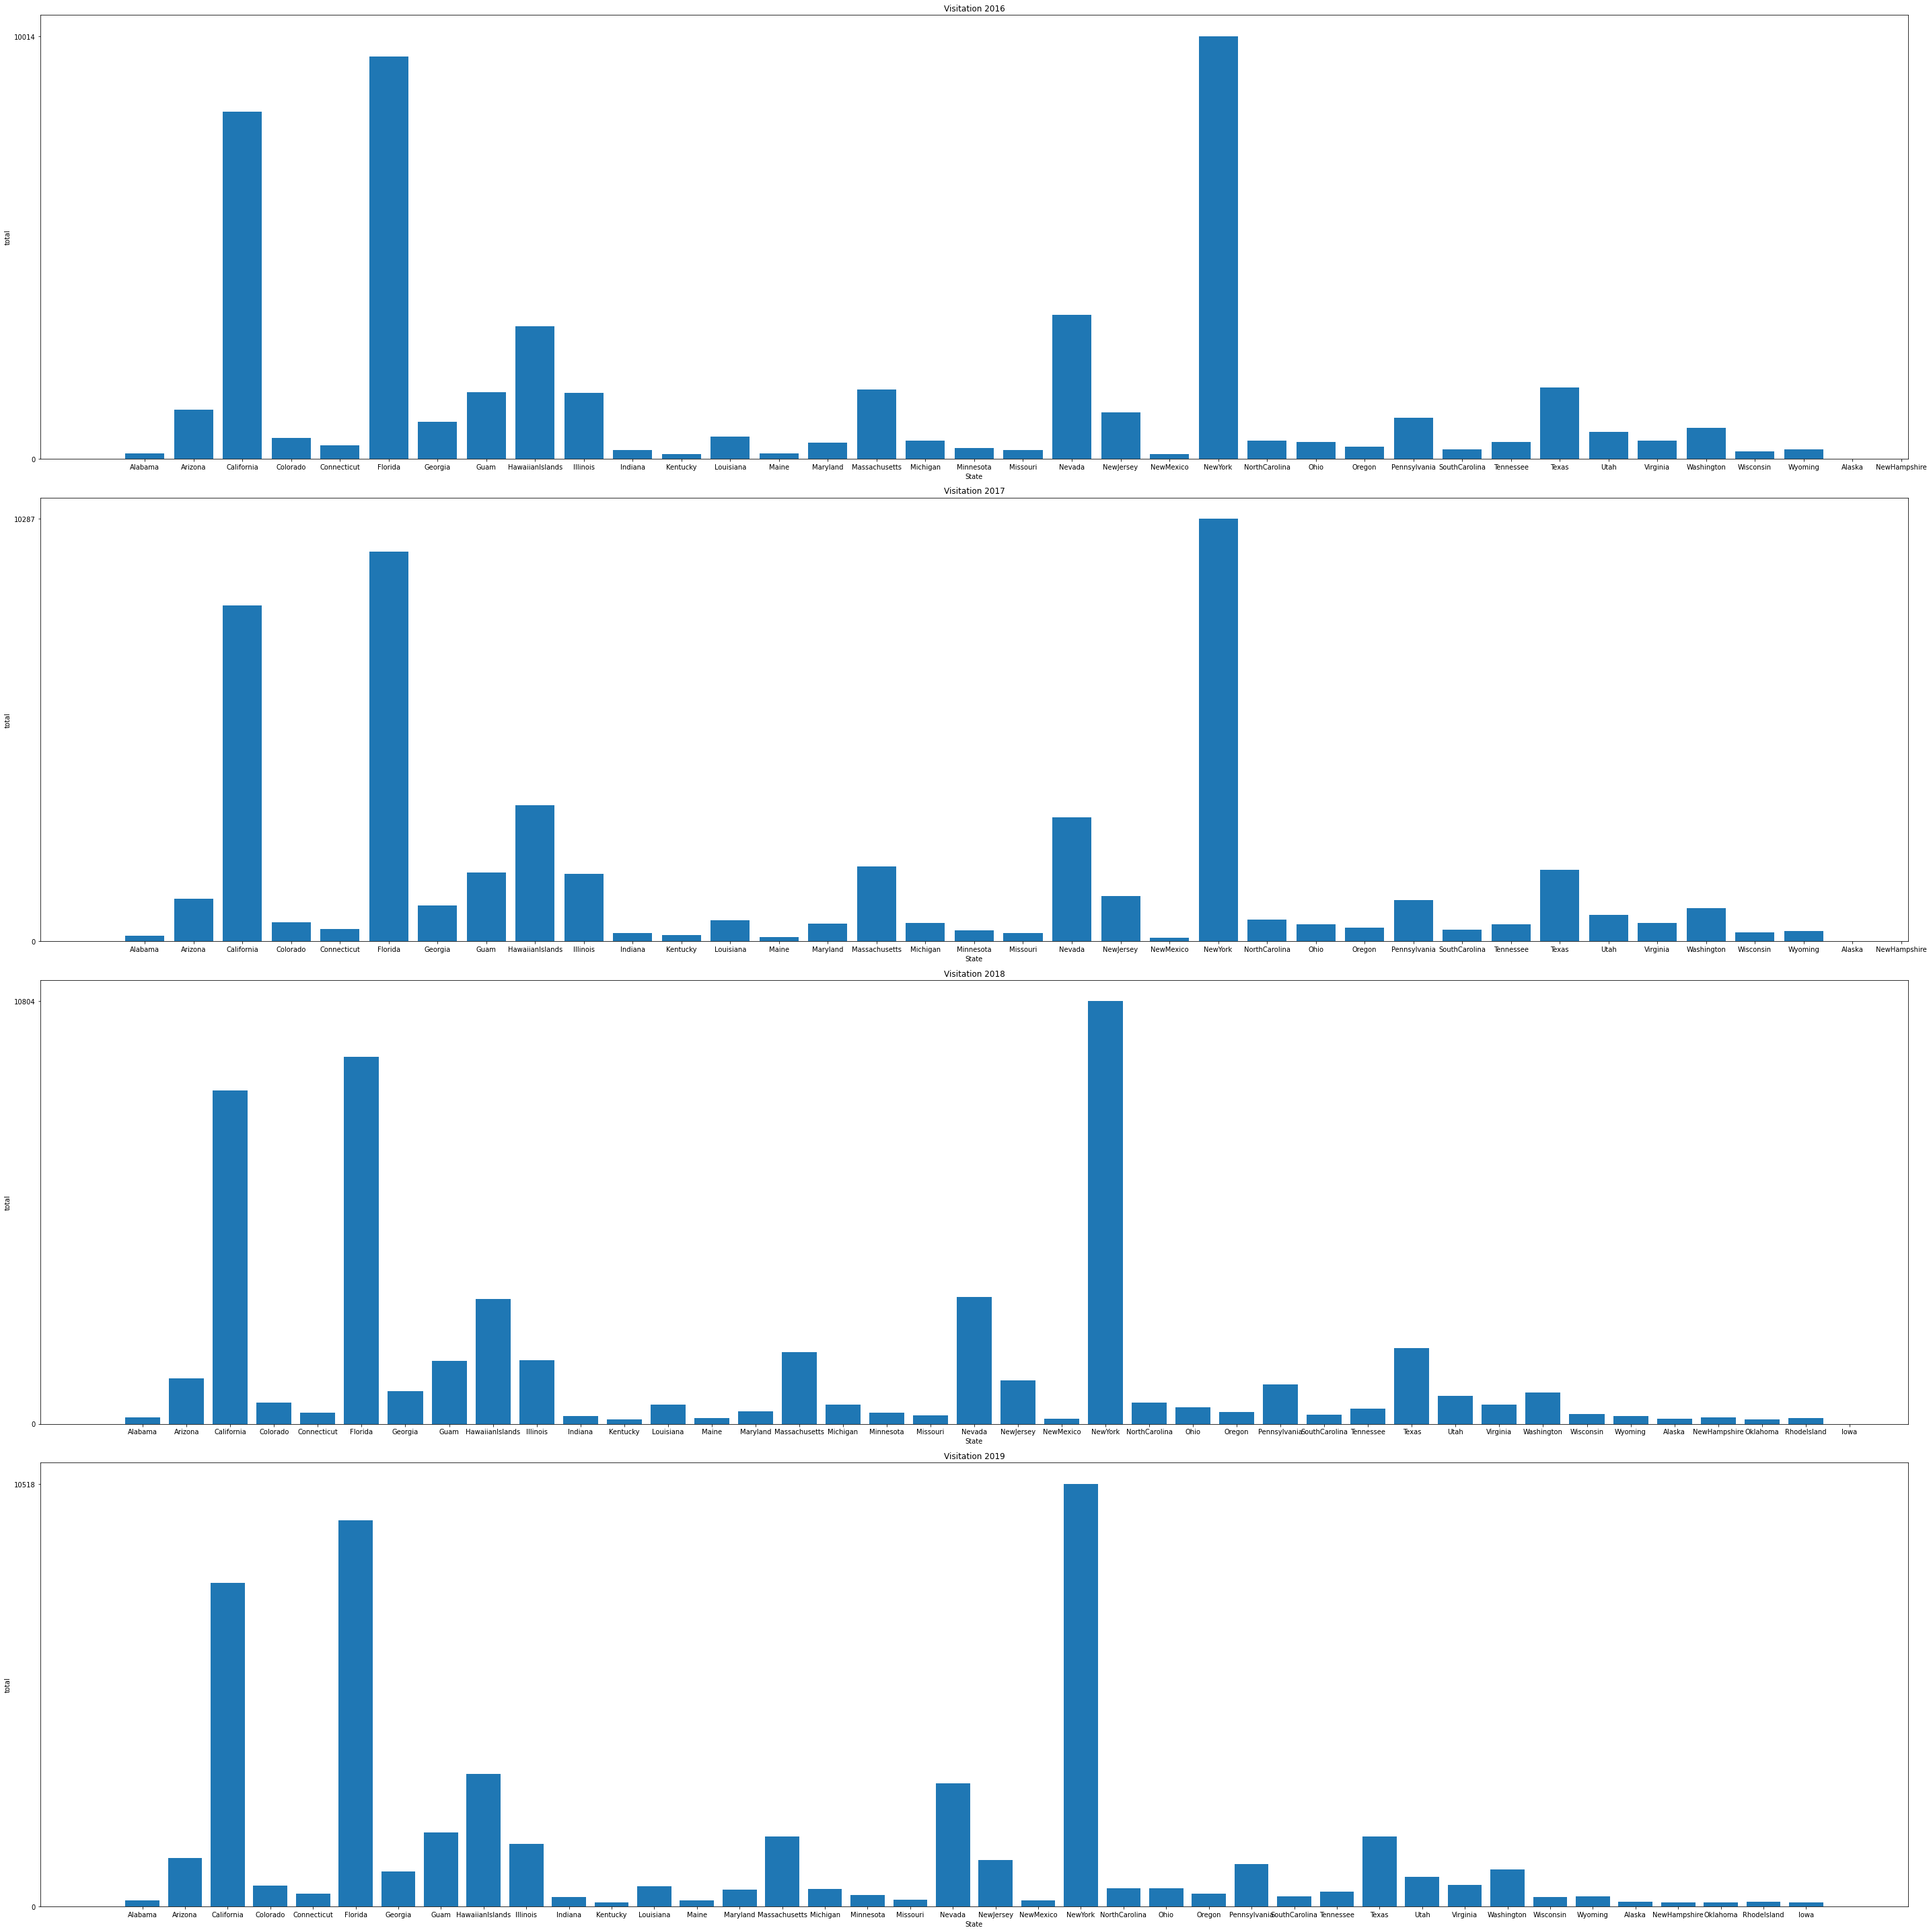

In [4]:
def make_bar_chart(data):
    data = data/1000
    fig, axs = plt.subplots(4, 1,figsize=(40, 40))
    axs[0].bar(data.index,data['visitation_2016'])
    axs[0].set(title='Visitation 2016', xlabel='State', ylabel='total',yticks=(0,data['visitation_2016'].max()))
    axs[1].bar(data.index,data['visitation_2017'])
    axs[1].set(title='Visitation 2017', xlabel='State', ylabel='total', yticks=(0,data['visitation_2017'].max()))
    axs[2].bar(data.index,data['visitation_2018'])
    axs[2].set(title='Visitation 2018', xlabel='State', ylabel='total', yticks=(0,data['visitation_2018'].max()))
    axs[3].bar(data.index,data['visitation_2019'])
    axs[3].set(title='Visitation 2019', xlabel='State', ylabel='total', yticks=(0,data['visitation_2019'].max()))
    fig.tight_layout()
    
    return plt.show()

make_bar_chart(load_data())


* Build the bar chart again with all visitation numbers transformed
* (Optional) If you want, you can annotate inside the graphs about the trend you observe in the new subplots. (E.g. In what way does the transformation improve the visualizations?)

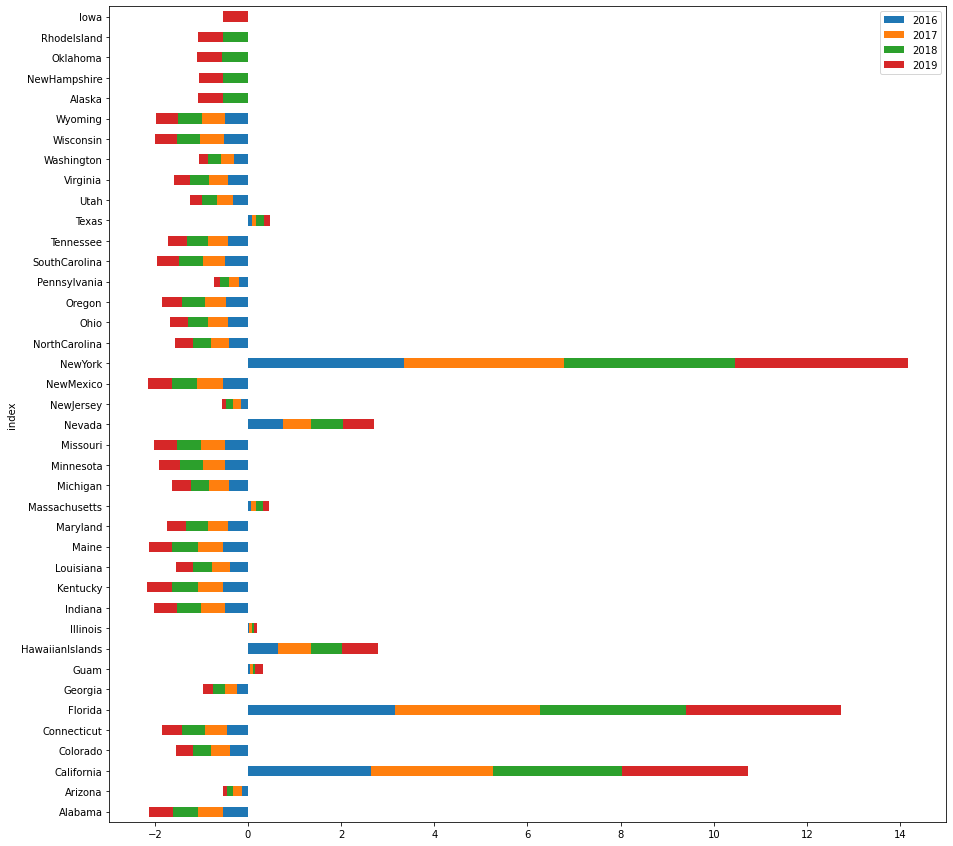

In [77]:
def make_transformed_bar_chart(data):
    mean16= data['visitation_2016'].mean()
    mean17= data['visitation_2017'].mean()
    mean18= data['visitation_2017'].mean()
    mean19= data['visitation_2018'].mean()
    scale16 = (data['visitation_2016'] - mean16) /data['visitation_2016'].std()
    scale17 = (data['visitation_2017'] - mean17) /data['visitation_2017'].std()
    scale18 = (data['visitation_2018'] - mean18) /data['visitation_2018'].std()
    scale19 = (data['visitation_2019'] - mean19) /data['visitation_2019'].std()
    new_frame= pd.DataFrame({"2016": scale16, "2017":scale17, "2018":scale18, "2019":scale19, "index": data.index})
    new_frame.plot.barh(x='index', stacked=True, figsize=(15,15))
    
    return plt.show()

make_transformed_bar_chart(load_data())